# Drawing histograms with matplotlib

The notebook source code is [here](matplotlib-histogram.ipynb).
Open this notebook at [Google Colab](https://colab.research.google.com/github/thebesttv/eserver-static/blob/main/blog/content/python/matplotlib-histogram.ipynb).

## Some preparation

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

# use a smaller fig size
fig_size = plt.rcParams['figure.figsize']
print(f"Original fig size: {fig_size}")
plt.rcParams['figure.figsize'] = fig_size = [x/2 for x in fig_size]
print(f"New fig size: {fig_size}")

Original fig size: [6.4, 4.8]
New fig size: [3.2, 2.4]


## A simple histogram

A [histogram](https://en.wikipedia.org/wiki/Histogram) counts the number of occurrences of data within different ranges.

Use [`plt.hist(data)`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html) to draw a very basic histogram.

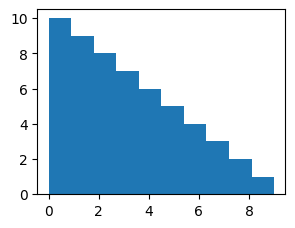

In [2]:
data = []
for i in range(10):
    data += [i] * (10 - i)

plt.hist(data)
plt.show()

## Adding labels

Pass the return value of `plt.hist()` to [`plt.bar_label()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.bar_label.html) to add value count to bars.

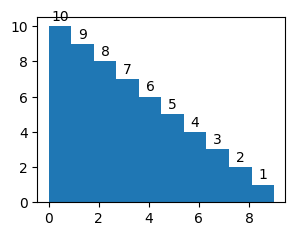

In [3]:
n, edges, bars = plt.hist(data)
plt.bar_label(bars, fontsize=10, padding=2)
plt.show()

The values are a bit too high, enlarge `ylim`. (Or you can hide the borders)

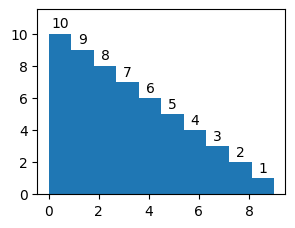

In [4]:
n, edges, bars = plt.hist(data)
plt.bar_label(bars, fontsize=10, padding=2)
plt.ylim(0, 11.5)
plt.show()

## Prettify bars

Reduce bar width, so as to separate them with blanks.
`rwidth` is a float number that sets the relative width of the bars as a fraction of the bin width.

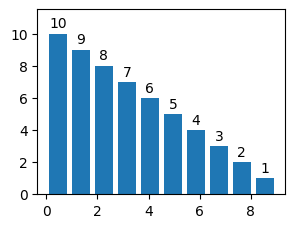

In [5]:
n, edges, bars = plt.hist(data, rwidth=0.8)
plt.bar_label(bars, fontsize=10, padding=2)
plt.ylim(0, 11.5)
plt.show()

What if we want some bars to have a different color? Again, use the `bars` returned by `plt.hist()`.

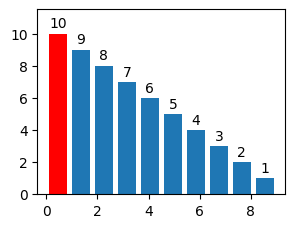

In [6]:
n, edges, bars = plt.hist(data, rwidth=0.8)
plt.bar_label(bars, fontsize=10, padding=2)
plt.ylim(0, 11.5)
bars[0].set_facecolor('r')
plt.show()

## A different orientation

Sometimes, the data can be so large that value counts overlap with each other (or other bars).

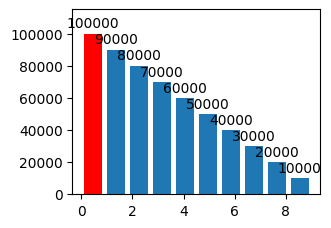

In [7]:
data = []
for i in range(10):
    data += [i] * (10 - i) * 10000
data = np.asarray(data)

n, edges, bars = plt.hist(data, rwidth=0.8)
plt.bar_label(bars, fontsize=10, padding=2)
plt.ylim(0, 11.5 * 10000)
bars[0].set_facecolor('r')
plt.show()

This calls for a horizontal histogram.  Pass `orientation="horizontal"` to `plt.hist()`.

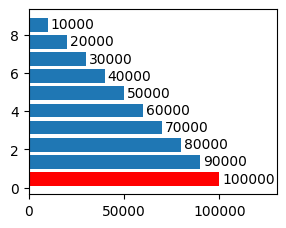

In [8]:
n, edges, bars = plt.hist(data, rwidth=0.8, orientation="horizontal")
plt.bar_label(bars, fontsize=10, padding=2)
plt.xlim(0, 130000)
bars[0].set_facecolor('r')
plt.show()

I want to reverse the y-axis.
Obtain axis with `fig, ax = plt.subplots()` and use `ax.invert_yaxis()` to do the trick.

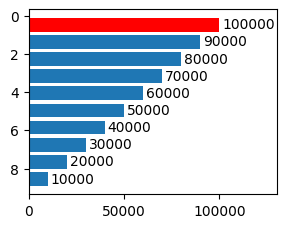

In [9]:
fig, ax = plt.subplots()
n, edges, bars = ax.hist(data, rwidth=0.8, orientation="horizontal")
ax.invert_yaxis()
plt.bar_label(bars, fontsize=10, padding=2)
plt.xlim(0, 130000)
bars[0].set_facecolor('r')
plt.show()

## Change the bins

### From the doc
bins: _int or sequence or str, default: rcParams["hist.bins"] (default: `10`)_

* If _bins_ is an integer, it defines the number of equal-width bins in the range.

* If _bins_ is a sequence, it defines the bin edges, including the left edge of the first bin and the right edge of the last bin; in this case, bins may be unequally spaced. All but the last (righthand-most) bin is half-open. In other words, if _bins_ is:
  ```
  [1, 2, 3, 4]
  ```
  then the first bin is `[1, 2)` (including 1, but excluding 2) and the second `[2, 3)`. The last bin, however, is `[3, 4]`, which _includes_ 4.

* If _bins_ is a string, it is one of the binning strategies supported by `numpy.histogram_bin_edges`: 'auto', 'fd', 'doane', 'scott', 'stone', 'rice', 'sturges', or 'sqrt'.

### Bins as an integer

When `bins` is an integer, it controls the number of bins.
By default, there are 10 bins.  So if `data` is in the range `[0, 20)`, the first bin counts the range `[0, 2)`, the second `[2, 4)`, the third `[4, 6)`, and so forth.

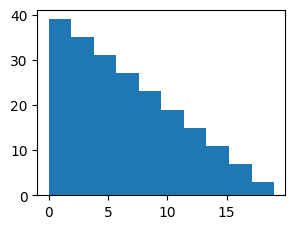

In [10]:
data = []
for i in range(20):
    data += [i] * (20 - i)

plt.hist(data)
plt.show()

Changing bin number to 5 makes each bin count 4 numbers. The first bin now counts `[0, 4)`.

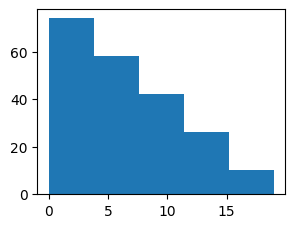

In [11]:
plt.hist(data, bins=5)
plt.show()

### Bins as a sequence

Now, the length of `bins` controls the bin number.

I am interested in the count of the smallest number (0), the middle ones (9, 10), and the largest one (19).  I want to count them separately from the rest of the range.

This makes the range unevenly spaced: `[0, 1)`, `[1, 5)`, `[5, 9)`, `[9, 11)`, `[11, 15)`, `[15, 19)`, `[19, 19]`.

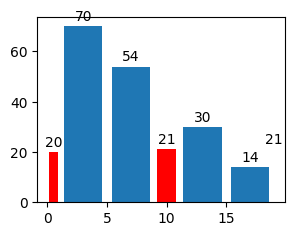

In [12]:
data = []
for i in range(20):
    data += [i] * (20 - i)
# add some 19s so the graph looks better
data += [19]*20

bins = [0, 1, 5, 9, 11, 15, 19, 19]
n, edges, bars = plt.hist(data, bins=bins, rwidth=0.8)
plt.bar_label(bars, fontsize=10, padding=2)
for i in [0, 3, 6]:
    bars[i].set_facecolor('r')
plt.show()

Notice that last bin? It's become invisible!

That's because the last range (`[19, 19]`) has zero width!
To fix this, make the range `[19, 20]`, with a width of one.

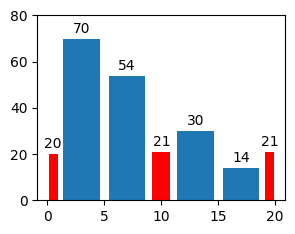

In [13]:
bins = [0, 1, 5, 9, 11, 15, 19, 20]
n, edges, bars = plt.hist(data, bins=bins, rwidth=0.8)
plt.bar_label(bars, fontsize=10, padding=2)
plt.ylim(0, 80)
for i in [0, 3, 6]:
    bars[i].set_facecolor('r')
plt.show()